In [1]:
### READ THE README.md FILE

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#from matplotlib import pyplot as plt
#matplotlib inline

In [57]:
#df = pd.read_csv('train.csv')
titanic = pd.read_csv('./train.csv')

In [58]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [60]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [61]:
#1. Create a bar chart showing how many missing values are in each column

df.isnull().sum().sum()

866

In [62]:
#2. Which column has the most `NaN` values? How many cells in that column are empty?

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [63]:
#Delete all rows where `Embarked` is empty
df[pd.isnull(df['Embarked'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [64]:
## Step 3: Feature extraction
#There are two columns that pertain to how many family members are on the boat for a given person. Create a new column called `FamilyCount` which will be the sum of those two columns.
titanic['FamilyCount'] = (titanic['SibSp'] + titanic['Parch'])


In [65]:
titanic.head

<bound method NDFrame.head of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25    

In [72]:
#Reverends have a special title in their name. Create a column called `IsReverend`: 1 if they're a preacher, 0 if they're not.
titanic['isReverend'] = 0

In [73]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,isReverend
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0


In [66]:
#In order to feed our training data into a classification algorithm, we need to convert our categories into 1's and 0's using `pd.get_dummies`
dum_embark = pd.get_dummies(titanic['Embarked'])

In [67]:
#Create 3 columns: `Embarked_C`, `Embarked_Q` and `Embarked_S`. These columns will have 1's and 0's that correspond to the `C`, `Q` and `S` values in the `Embarked` column
dum_embark.columns = ['Embarked_C', 'Embarked_Q', 'Embarked_S']
#df['Embarked'] = df['Embarked_C (C)']
#df['Embarked'] = df['Embarked_Q (Q)']
#df['Embarked'] = df['Embarked_S (S)']
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [68]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [74]:
## Step 4: Exploratory analysis
#1. What was the survival rate overall?
np.mean(titanic['Survived'])

0.3838383838383838

In [76]:
#2. Which gender fared the worst? What was their survival rate?
titanic.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [78]:
#3. What was the survival rate for each `Pclass`?
p_class =titanic.groupby('Pclass')['Survived'].mean()
print(p_class)

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [79]:
#4. Did any reverends survive? If so, how many?
titanic.groupby('isReverend')['Survived'].mean()

isReverend
0    0.383838
Name: Survived, dtype: float64

In [81]:
#5. What is the survival rate for cabins marked **¯\\_(ツ)_/¯**
titanic.groupby(titanic['Cabin'] == '¯\(ツ)/¯')['Survived'].mean()

Cabin
False    0.383838
Name: Survived, dtype: float64

In [82]:
#6. What is the survival rate for people whose `Age` is empty?
titanic.groupby(titanic['Age'].isnull())['Survived'].mean()

Age
False    0.406162
True     0.293785
Name: Survived, dtype: float64

In [83]:
#7. What is the survival rate for each port of embarkation?
titanic.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

In [85]:
#8. What is the survival rate for children (under 12) in each `Pclass`?
titanic['children'] = 0
titanic.loc[titanic['Age'] < 12, 'children'] = 1

In [87]:
#9. Did the captain of the ship survive? Is he on the list?
titanic.loc[titanic['Name'].str.contains('Cap')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,isReverend,children
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0,B22,S,2,0,0


In [88]:
#10. Of all the people that died, who had the most expensive ticket? How much did it cost?
titanic.sort_values('Fare').tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,isReverend,children
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S,5,0,0
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S,5,0,0
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,0,0,0
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,0,0,0
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,1,0,0


In [90]:
#11. Does having family on the boat help or hurt your chances of survival?
family =titanic.groupby(titanic['FamilyCount'])['Survived'].mean()
print(family)

FamilyCount
0     0.303538
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64


Text(0.5,1,'Survival rate based on Family Count')

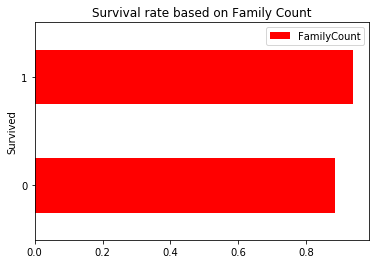

In [91]:
titanic.groupby('Survived').mean()[['FamilyCount']].plot(kind='barh', color = 'Red');
plt.title('Survival rate based on Family Count')

Text(0.5,1,'Survival rate based on Parch')

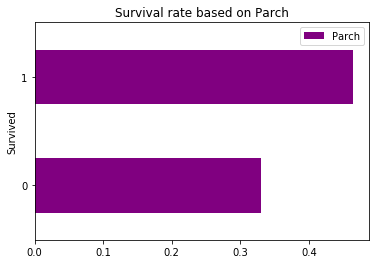

In [107]:
titanic.groupby('Survived').mean()[['Parch']].plot(kind='barh', color = 'purple');
plt.title('Survival rate based on Parch')

Text(0.5,1,'Survival rate based on Class')

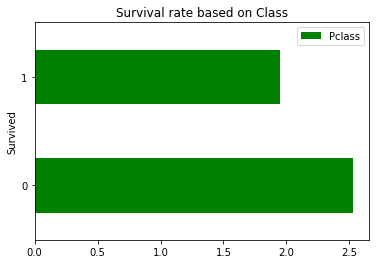

In [94]:
titanic.groupby('Survived').mean()[['Pclass']].plot(kind='barh', color = 'Green');
plt.title('Survival rate based on Class')

Text(0.5,1,'Survival rate based on Age')

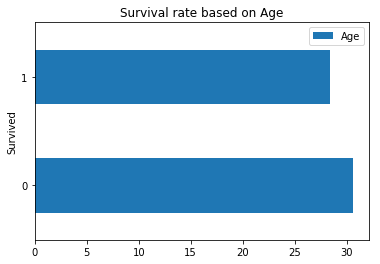

In [95]:
titanic.groupby('Survived').mean()[['Age']].plot(kind='barh');
plt.title('Survival rate based on Age')

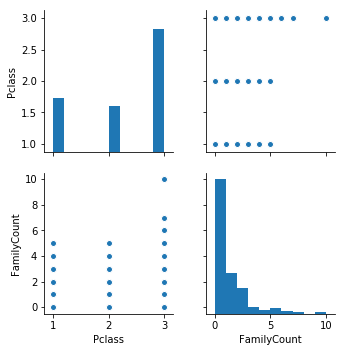

In [98]:
sns.pairplot(titanic[['Pclass', 'FamilyCount']])